In [1]:
import nltk 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_data=pd.read_csv('Corona_NLP_train.csv',encoding='ISO-8859-1',index_col=False)

In [3]:
#This Step we display the max colwidth an ddisplay the first 5 rows 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative


In [4]:
#Display the info to see there are any missing value 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


# EXPLORATION DATA ANALYSIS

  #Now we will process explore data analysis and adding a lenght column for detailed EDA. Also add anothre length column after clean up 

In [5]:
#This function we create another columns name 'text_length_cleanup' contain length of a text
def count_word(text):
    return len(text.split())
train_data['text_length_BF_cleanup'] = train_data['OriginalTweet'].apply(count_word)
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text_length_BF_cleanup
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,8
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,38
2,3801,48753,Vagabonds,16-03-2020,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,14
3,3802,48754,NaN,16-03-2020,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,42
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,40


In [6]:
train_data['TweetAt']= pd.to_datetime(train_data['TweetAt'], format = '%d-%m-%Y')
train_data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text_length_BF_cleanup
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8,Neutral,8
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,38
2,3801,48753,Vagabonds,2020-03-16,"Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P",Positive,14
3,3802,48754,NaN,2020-03-16,"My food stock is not the only one which is empty...\r\r\n\r\r\nPLEASE, don't panic, THERE WILL BE ENOUGH FOOD FOR EVERYONE if you do not take more than you need. \r\r\nStay calm, stay safe.\r\r\n\r\r\n#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j",Positive,42
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n",Extremely Negative,40
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",2020-04-14,Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp,Neutral,12
41153,44952,89904,NaN,2020-04-14,Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?,Extremely Negative,23
41154,44953,89905,NaN,2020-04-14,"You know itÂs getting tough when @KameronWilds is rationing toilet paper #coronavirus #toiletpaper @kroger martinsville, help us out!!",Positive,18
41155,44954,89906,NaN,2020-04-14,Is it wrong that the smell of hand sanitizer is starting to turn me on?\r\r\n\r\r\n#coronavirus #COVID19 #coronavirus,Neutral,18


In [7]:
#We count the how much categorical value in the label column
train_data['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

Extermly Positive and Extremly Negative will be consider as Postive and negative so we will map those together

In [8]:
replaced_dict = {'Extremely Positive':'Positive','Extremely Negative':'Negative'}
train_data['Sentiment']= train_data['Sentiment'].replace(replaced_dict)

In [9]:
train_data['Sentiment'].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

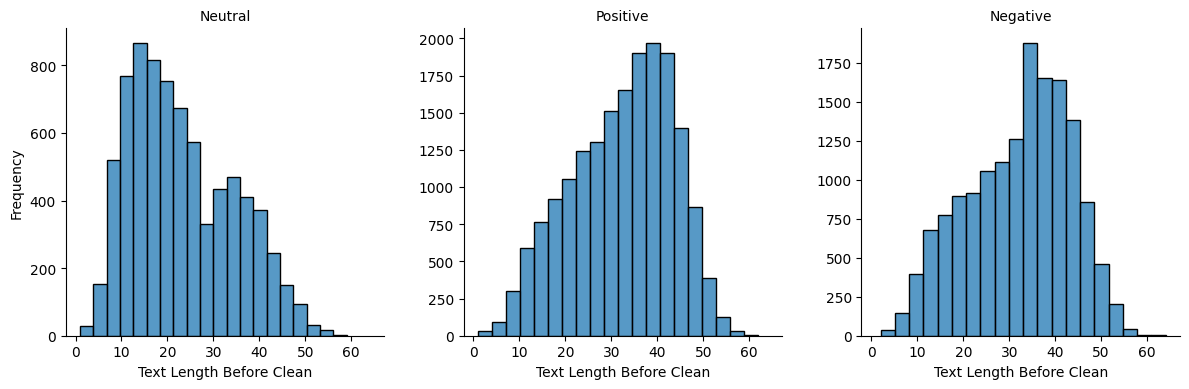

In [10]:
#we will create FacetFrid with Histograms text length for each label
g = sns.FacetGrid(train_data, col = "Sentiment", height = 4, sharey = False)
g.map(sns.histplot, "text_length_BF_cleanup",bins = 20)
#Nameing for label
g.set_titles(col_template ="{col_name}")
g.set_axis_labels("Text Length Before Clean","Frequency")
plt.show

Neutral : As we see for the Neutral label the length of the text before clean up mostly distributed in the range 10 - 30 
Positive : As we see for the Positive label the length of the text before clean up mostly distributed in the range 30 - 50 
Negative : As we see for the Negative label the length of the text before clean up mostly distributed in the range 35 - 48 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


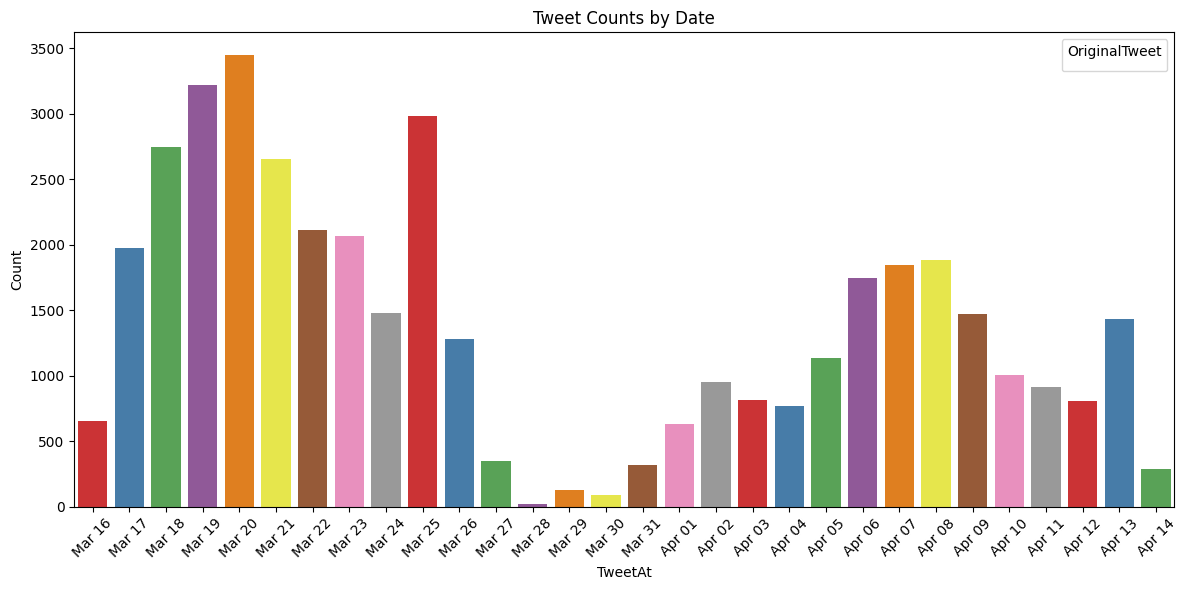

In [11]:
#ingore all the warning
import warnings
warnings.filterwarnings('ignore')
# we will create Countplot 
plt.figure(figsize = (12,6))
sns.countplot(data = train_data, x = 'TweetAt', palette = 'Set1')
#set label and tite 
plt.xlabel('TweetAt')
plt.ylabel('Count')
plt.title('Tweet Counts by Date')
#Get Unique dates and format them as abbreviated dates
unique_dates = train_data['TweetAt'].dt.date.unique()
formatted_Dates =[dt.strftime('%b %d') for dt in unique_dates]
#Set x-axis ticks and labels 
plt.xticks(ticks = range(len(unique_dates)),labels = formatted_Dates, rotation = 45)
#show plot 
plt.legend(title='OriginalTweet')
plt.tight_layout()
plt.show()

The graph show the most people tweeting about Corona Virus the most was in date range from Mar-17 until Mar 21, I believe the reason because that is the day things get serious , lock down order was given.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


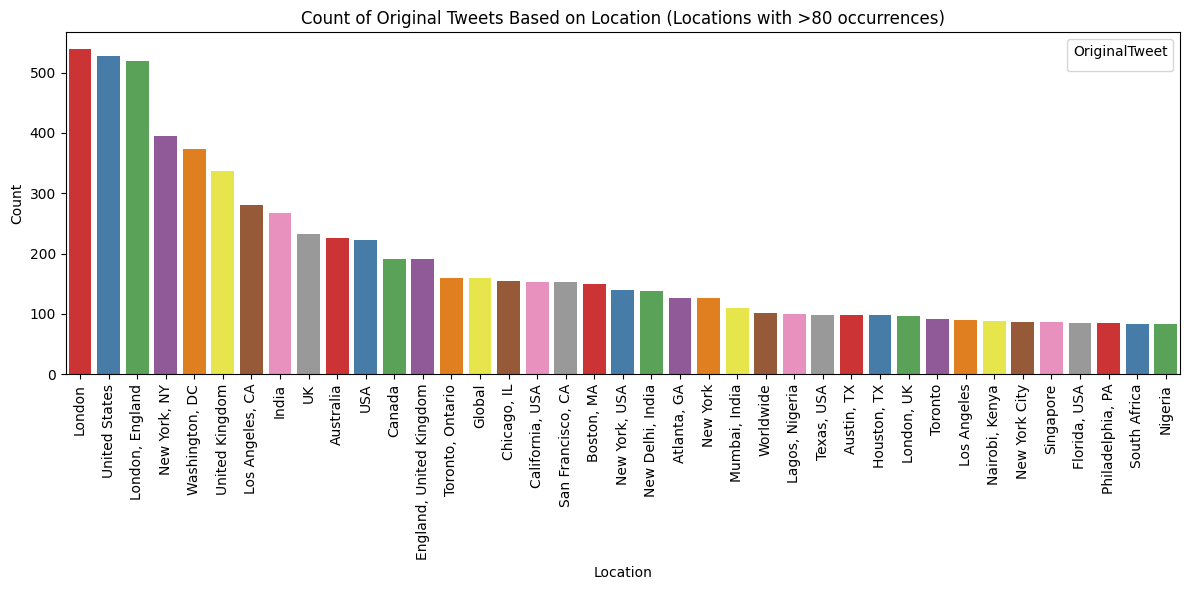

In [12]:
# Count the occurrences of each location
location_counts = train_data['Location'].value_counts()

# Filter locations with counts greater than 80
popular_locations = location_counts[location_counts > 80].index

# Filter the dataframe based on popular locations
df_filtered = train_data[train_data['Location'].isin(popular_locations)]

# Sort locations by counts in descending order
sorted_locations = df_filtered['Location'].value_counts().index

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_filtered, x='Location', palette='Set1', order=sorted_locations)

# Set labels and title
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Count of Original Tweets Based on Location (Locations with >80 occurrences)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.legend(title='OriginalTweet')
plt.tight_layout()
plt.show()

As we see Londan has the most tweet maybe there are lots of influence people and  and Nigria has the least tweet because there are lack of technologies

# Data Cleaning 

In [13]:
#The Original Tweet is a mess we have to clean it up

import re 
def clean_tweet(tweet):
    tweet = re.sub(r'http\S+','',tweet) # Remove URL 
    tweet = re.sub(r'@\w+','',tweet) # Remove Mentions  
    tweet = re.sub(r'#','',tweet) # Remove hastag 
    tweet = re.sub(r'-','',tweet) # Remove hastag 
    tweet = re.sub(r'[^\w\s]','',tweet) # Remove Special Character and punctuation 
    tweet = tweet.encode('ascii','ignore').decode() # Remove non-ASCII 
    tweet = tweet.lower() #transfer all text to lower case
    tweet = ' '.join(tweet.split()) #remove extra whitespaces
    return tweet 

#Aplly the clean_tweet function to the 'TweetAt' column 
train_data['OriginalTweet'] = train_data['OriginalTweet'].apply(clean_tweet)
train_data

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text_length_BF_cleanup
0,3799,48751,London,2020-03-16,and and,Neutral,8
1,3800,48752,UK,2020-03-16,advice talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist gp set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,38
2,3801,48753,Vagabonds,2020-03-16,coronavirus australia woolworths to give elderly disabled dedicated shopping hours amid covid19 outbreak,Positive,14
3,3802,48754,NaN,2020-03-16,my food stock is not the only one which is empty please dont panic there will be enough food for everyone if you do not take more than you need stay calm stay safe covid19france covid_19 covid19 coronavirus confinement confinementotal confinementgeneral,Positive,42
4,3803,48755,NaN,2020-03-16,me ready to go at supermarket during the covid19 outbreak not because im paranoid but because my food stock is litteraly empty the coronavirus is a serious thing but please dont panic it causes shortage coronavirusfrance restezchezvous stayathome confinement,Negative,40
...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",2020-04-14,airline pilots offering to stock supermarket shelves in nz lockdown covid19,Neutral,12
41153,44952,89904,NaN,2020-04-14,response to complaint not provided citing covid19 related delays yet prompt in rejecting policy before consumer tat is over way to go,Negative,23
41154,44953,89905,NaN,2020-04-14,you know its getting tough when is rationing toilet paper coronavirus toiletpaper martinsville help us out,Positive,18
41155,44954,89906,NaN,2020-04-14,is it wrong that the smell of hand sanitizer is starting to turn me on coronavirus covid19 coronavirus,Neutral,18


In [14]:
#This function we create another columns name 'text_length_AF_cleanup' contain length of a text
def count_word(text):
    return len(text.split())
train_data['text_length_AF_cleanup'] = train_data['OriginalTweet'].apply(count_word)
train_data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text_length_BF_cleanup,text_length_AF_cleanup
0,3799,48751,London,2020-03-16,and and,Neutral,8,2
1,3800,48752,UK,2020-03-16,advice talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist gp set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,38,38
2,3801,48753,Vagabonds,2020-03-16,coronavirus australia woolworths to give elderly disabled dedicated shopping hours amid covid19 outbreak,Positive,14,13
3,3802,48754,NaN,2020-03-16,my food stock is not the only one which is empty please dont panic there will be enough food for everyone if you do not take more than you need stay calm stay safe covid19france covid_19 covid19 coronavirus confinement confinementotal confinementgeneral,Positive,42,41
4,3803,48755,NaN,2020-03-16,me ready to go at supermarket during the covid19 outbreak not because im paranoid but because my food stock is litteraly empty the coronavirus is a serious thing but please dont panic it causes shortage coronavirusfrance restezchezvous stayathome confinement,Negative,40,39


<function matplotlib.pyplot.show(close=None, block=None)>

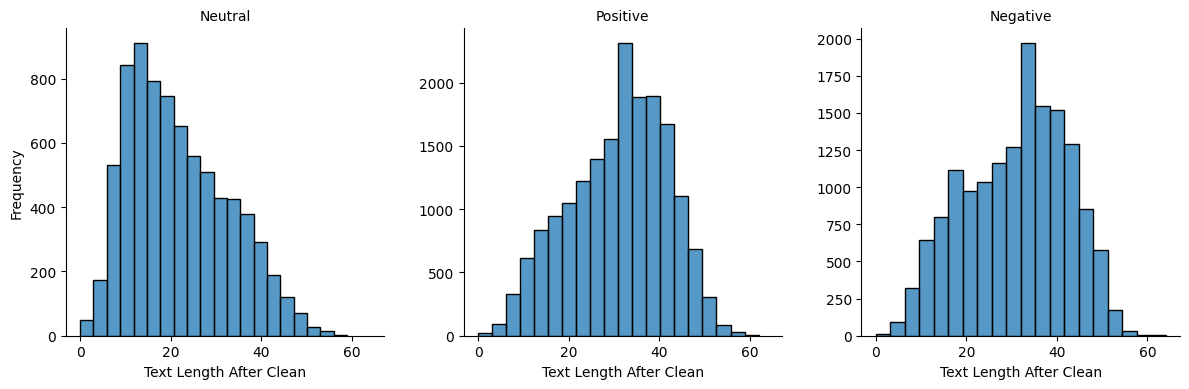

In [15]:
#we will create FacetFrid with Histograms text length for each label
g = sns.FacetGrid(train_data, col = "Sentiment", height = 4, sharey = False)
g.map(sns.histplot, "text_length_AF_cleanup",bins = 20)
#Nameing for label
g.set_titles(col_template ="{col_name}")
g.set_axis_labels("Text Length After Clean","Frequency")
plt.show

Neutral : As we see for the Neutral label the length of the text after clean up mostly distributed in the range 10 - 20 
Positive : As we see for the Positive label the length of the text after clean up mostly distributed in the range 30 - 45 
Negative : As we see for the Negative label the length of the text after clean up mostly distributed in the range 33 - 45 

In [16]:
#So we will filter the only columns has the text length > 5 only 
filtered_df = train_data[train_data['text_length_AF_cleanup'] > 5]
filtered_df.head(100)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text_length_BF_cleanup,text_length_AF_cleanup
1,3800,48752,UK,2020-03-16,advice talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist gp set up online shopping accounts if poss adequate supplies of regular meds but not over order,Positive,38,38
2,3801,48753,Vagabonds,2020-03-16,coronavirus australia woolworths to give elderly disabled dedicated shopping hours amid covid19 outbreak,Positive,14,13
3,3802,48754,NaN,2020-03-16,my food stock is not the only one which is empty please dont panic there will be enough food for everyone if you do not take more than you need stay calm stay safe covid19france covid_19 covid19 coronavirus confinement confinementotal confinementgeneral,Positive,42,41
4,3803,48755,NaN,2020-03-16,me ready to go at supermarket during the covid19 outbreak not because im paranoid but because my food stock is litteraly empty the coronavirus is a serious thing but please dont panic it causes shortage coronavirusfrance restezchezvous stayathome confinement,Negative,40,39
5,3804,48756,"ÃT: 36.319708,-82.363649",2020-03-16,as news of the regions first confirmed covid19 case came out of sullivan county last week people flocked to area stores to purchase cleaning supplies hand sanitizer food toilet paper and other goods reports,Positive,36,34
...,...,...,...,...,...,...,...,...
97,3896,48848,"Washington, DC",2020-03-16,instead of paid sick leave is providing 2 weeks paid leave only to people who test positive for covid19 or are placed under mandatory quarantine this is insufficient to protect staff and the public especially with little testing av,Positive,41,39
98,3897,48849,San Joaquin Valley CA,2020-03-16,i followed this when i went shopping a few days ago its a pain but necessary protect yourself from grocery shopping consumer reports covid2019 stayhealthy,Positive,27,25
99,3898,48850,Planet Earth,2020-03-16,i took these pictures today at my home grocery store in montgomery county md no flour sugar sweet potatoes potatoes orange juice paper towels or toilet paper low on meat mac amp cheese coronapocolypse covid_19 panicbuying,Negative,37,36
100,3899,48851,"Portsmouth, England",2020-03-16,i hate grocery shopping in general but i swear im doing it online next shop can not deal with the swathes of panic buyers at all covid19 coronavirus coronavirusuk anxiety panicbuyinguk morons,Negative,32,32


In [17]:
#So we will filter the only columns has the text length <= 5 only 
filtered_df2 = train_data[train_data['text_length_AF_cleanup'] <= 5]
filtered_df2.head(100)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text_length_BF_cleanup,text_length_AF_cleanup
0,3799,48751,London,2020-03-16,and and,Neutral,8,2
16,3815,48767,Saudi Arabia,2020-03-16,_ 13 _,Neutral,32,3
155,3954,48906,"Nairobi, Kenya",2020-03-16,cleanshelf supermarket sanitizers 19,Neutral,4,4
186,3985,48937,United States,2020-03-16,,Neutral,19,0
239,4038,48990,Right behind you :),2020-03-16,please read this thread,Positive,4,4
...,...,...,...,...,...,...,...,...
10820,14619,59571,Malaysia,2020-03-20,shopping online during covid19,Neutral,5,4
10946,14745,59697,NaN,2020-03-20,can we just not coronacrisis,Neutral,6,5
11554,15353,60305,"Wentworth Falls NSW, AU",2020-03-20,can i have your octopus,Neutral,6,5
11638,15437,60389,Earth,2020-03-20,please stop hoarding coronavirus covid19,Neutral,6,5


In [18]:
#we reset the index strart from 0 again and we take the text length > 5 only
filtered_df = filtered_df.sample(frac = 1).reset_index(drop = True)
filtered_df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text_length_BF_cleanup,text_length_AF_cleanup
0,5397,50349,NaN,2020-03-17,the profitability of the everything stores empire rests not just on its ability to squeeze workers and exploit economies of scale but also on its ability to forge a seamless connection between millions of individuals and amazon digitalcapitalism,Positive,39,38
1,17225,62177,Dublin,2020-03-21,no nonsense putin how a nation like russia with a population of 144 million people have a lower covid_19 cases any drugstore that increased their facemasks prices licence revoked leadership coronaviruspandemic,Negative,33,31
2,23367,68319,Norwich,2020-03-24,music festivals may have been cancelled but you can still get that glastonbury fix join millions of others in online queus for supermarkets to release new shopping delivery dates and share excited messages with firends and family when you get one coronavirus,Positive,44,42
3,18272,63224,"Greater Richmond, Williamsburg",2020-03-21,the federal deposit insurance corporation fdic has received reports of fraudulent communications that have the appearance of being from this agency read more here coronavirus,Negative,27,25
4,21384,66336,Toronto,2020-03-23,3 capital economics that left it lower than during the early2016 or late2018 price crashes while the hit to demand from the coronavirus outbreak is weighing heavily on prices the falls also reflect a potentially seismic shift in the global oil market more below cdnecon,Negative,46,45
...,...,...,...,...,...,...,...,...
40793,9753,54705,"MediaCityUK, Salford",2020-03-19,the education secretary tells bbcbreakfast key workers whos children can continue to go to school include nhs workers school staff and delivery drivers he continues to say that a full list will be coming later covid19uk coronavirus,Neutral,37,37
40794,29980,74932,NaN,2020-04-02,what is even worse is the fact that the essential workers that are still delivering food and products aren t tested for the so it is literally insane it is a dog chasing its own tail the doctors and hospitals are essential stock up and stay inside,Negative,47,47
40795,22016,66968,DUBAI(U.A.E),2020-03-23,gold gold prices which contracted by around 10 per cent last week after a short rally is likely to plummet to 1300 from its current 1505 an ounce level in the second quarter as the global economy succumbs to the devastating impact of the covid19 pandemic stay safe trade,Negative,49,49
40796,31541,76493,USA,2020-04-03,be careful not to blindly accept altruism in some of these businesses and landlords offering price freezes as their way of contributing during this they offer a price freeze now because in the coming recession prices may drop far below where they were before coronavirus,Negative,45,45


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


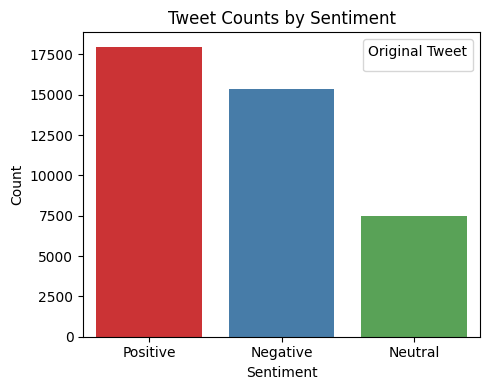

In [19]:
#Creagte count plot 
plt.figure(figsize =(5,4))
sns.countplot(data  = filtered_df, x = 'Sentiment',palette = 'Set1')

#Set Labels and title 
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Tweet Counts by Sentiment')
#Show the plot 
plt.legend(title = 'Original Tweet')
plt.tight_layout()
plt.show()

As we see the Most amount of Tweet are Postive ( 17600)  and the least are Neutral ( 7500) 

# Model Evaluation

we will use Multinomial Naive Baynes after vectorization. Also remove stopwirds during the vectorization process to improve the accuracy. Naive Baynes is sensitive to stopwords. THe Reasion we use Multinomial because the label is categorical data.

In [20]:
#Import library for further use  
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [21]:
# List of stopwords to remove, not using the built in library for this run. 
# We will use the built in library for BERT and roBERTa.

stopwords = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
    "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
    "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that",
    "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having",
    "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
    "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
    "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
    "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
    "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
    "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"
]

In [22]:
# We will create a pipeline for convience 
pipeline = Pipeline([('count_vectorizer', CountVectorizer(stop_words=stopwords)),('tfidf_transformer', TfidfTransformer()),('classifier', MultinomialNB())
                   ])
#Step 1 : count vectorizer 
#Step 2 : Tfidtransform
#Step 3 : MultinomialNV classifier

In [23]:
# Define features and target
X = filtered_df.drop(["Sentiment", "Location", "ScreenName", "UserName", "TweetAt", "text_length_BF_cleanup","text_length_AF_cleanup"], axis=1)
y = filtered_df["Sentiment"]
# Split data into train, validation, and test 30%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
print(y_train.shape)
print(X_train.shape)

(28558,)
(28558, 1)


In [25]:
X_train_column = X_train['OriginalTweet'].values.ravel()
X_train_column.shape
X_train=X_train_column

y_train.shape

(28558,)

In [26]:
#Over sampling for NB Classifier to make the label dataset balance
from imblearn.over_sampling import RandomOverSampler
import numpy as np
# Reshape the X_train array to have a single feature
X_train_reshaped = X_train.reshape(-1, 1)

#Print counts before oversampling
print("class distribution before oversampling")
print(y_train.value_counts())

#apply random Oversampling to balance the label data 
random = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = random.fit_resample(X_train_reshaped, y_train)
print("class distribution after oversampling")
print(y_train_resampled.value_counts())

class distribution before oversampling
Positive    12580
Negative    10697
Neutral      5281
Name: Sentiment, dtype: int64
class distribution after oversampling
Negative    12580
Positive    12580
Neutral     12580
Name: Sentiment, dtype: int64


In [27]:
print("X_train shape:", X_train_resampled.shape)
print("y_train shape:", y_train_resampled.shape)

X_train shape: (37740, 1)
y_train shape: (37740,)


In [28]:
flatened_Xtrain_resampled = X_train_resampled.flatten()

In [29]:
# Fit the pipeline to the training data
pipeline.fit(flatened_Xtrain_resampled, y_train_resampled)

Pipeline(steps=[('count_vectorizer',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             'your', 'yours', 'yourself',
                                             'yourselves', 'he', 'him', 'his',
                                             'himself', 'she', 'her', 'hers',
                                             'herself', 'it', 'its', 'itself',
                                             'they', 'them', 'their', 'theirs',
                                             'themselves', 'what', ...])),
                ('tfidf_transformer', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [30]:
# Metrics for Training data
y_predtrain = pipeline.predict(flatened_Xtrain_resampled)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train_resampled, y_predtrain)

# Generate the classification report
class_report = classification_report(y_train_resampled, y_predtrain, output_dict=True)
#Convert to dataframe 
class_report_df = pd.DataFrame(class_report).transpose()
print(class_report_df)

              precision    recall  f1-score       support
Negative       0.839202  0.879094  0.858685  12580.000000
Neutral        0.912587  0.850636  0.880523  12580.000000
Positive       0.845824  0.863037  0.854344  12580.000000
accuracy       0.864255  0.864255  0.864255      0.864255
macro avg      0.865871  0.864255  0.864517  37740.000000
weighted avg   0.865871  0.864255  0.864517  37740.000000


As we see the trained data has the F1-score around 86% 

In [31]:
X_val_column = X_val['OriginalTweet'].values.ravel()
flatened_Xval = X_val_column.flatten()

In [32]:
# Predict using the pipeline with validation data
y_pred = pipeline.predict(flatened_Xval)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
# Generate the classification report
class_report = classification_report(y_val, y_pred, output_dict=True)
#Convert to DataFrame 
class_report_df = pd.DataFrame(class_report).transpose()
print(class_report_df)

              precision    recall  f1-score       support
Negative       0.704569  0.748167  0.725714   4638.000000
Neutral        0.628941  0.550430  0.587072   2211.000000
Positive       0.753903  0.752365  0.753133   5391.000000
accuracy       0.714297  0.714297  0.714297      0.714297
macro avg      0.695804  0.683654  0.688640  12240.000000
weighted avg   0.712636  0.714297  0.712747  12240.000000


Let's train and boostin the model with BERT with 3 epochs which we won't oversample the data after we split to see if able to achieve the hgiher accuracy score. We also use padding duiring tokenization and attention masking on both models . Training will be done with a low number of epoches to save process time 

# BERT 

In [33]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import nltk
from nltk.corpus import stopwords

In [34]:
filtered_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text_length_BF_cleanup,text_length_AF_cleanup
0,5397,50349,NaN,2020-03-17,the profitability of the everything stores empire rests not just on its ability to squeeze workers and exploit economies of scale but also on its ability to forge a seamless connection between millions of individuals and amazon digitalcapitalism,Positive,39,38
1,17225,62177,Dublin,2020-03-21,no nonsense putin how a nation like russia with a population of 144 million people have a lower covid_19 cases any drugstore that increased their facemasks prices licence revoked leadership coronaviruspandemic,Negative,33,31
2,23367,68319,Norwich,2020-03-24,music festivals may have been cancelled but you can still get that glastonbury fix join millions of others in online queus for supermarkets to release new shopping delivery dates and share excited messages with firends and family when you get one coronavirus,Positive,44,42
3,18272,63224,"Greater Richmond, Williamsburg",2020-03-21,the federal deposit insurance corporation fdic has received reports of fraudulent communications that have the appearance of being from this agency read more here coronavirus,Negative,27,25
4,21384,66336,Toronto,2020-03-23,3 capital economics that left it lower than during the early2016 or late2018 price crashes while the hit to demand from the coronavirus outbreak is weighing heavily on prices the falls also reflect a potentially seismic shift in the global oil market more below cdnecon,Negative,46,45


In [35]:
filtered_df = filtered_df.drop(["Location", "ScreenName", "UserName", "TweetAt", "text_length_BF_cleanup","text_length_AF_cleanup"], axis=1)
filtered_df.head(10)

,OriginalTweet,Sentiment
0,the profitability of the everything stores empire rests not just on its ability to squeeze workers and exploit economies of scale but also on its ability to forge a seamless connection between millions of individuals and amazon digitalcapitalism,Positive
1,no nonsense putin how a nation like russia with a population of 144 million people have a lower covid_19 cases any drugstore that increased their facemasks prices licence revoked leadership coronaviruspandemic,Negative
2,music festivals may have been cancelled but you can still get that glastonbury fix join millions of others in online queus for supermarkets to release new shopping delivery dates and share excited messages with firends and family when you get one coronavirus,Positive
3,the federal deposit insurance corporation fdic has received reports of fraudulent communications that have the appearance of being from this agency read more here coronavirus,Negative
4,3 capital economics that left it lower than during the early2016 or late2018 price crashes while the hit to demand from the coronavirus outbreak is weighing heavily on prices the falls also reflect a potentially seismic shift in the global oil market more below cdnecon,Negative
5,how much toiletpaper is enough coronavirus,Neutral
6,bucks co covid 19 update if you experience price gouging please contact the dept of consumer protection,Positive
7,our local has had to put up signs to ask people to please be kind in light of food shortages and panic buying couldnt ask for a more dedicated or friendly team who dont deserve the abuse theyve received plus spotted shoplifting as we left coronavirus,Positive
8,spent the past hour filling an order for fred meyer now i expected some things to be out of stock not the entire freaking list greedy greedy hoglets stoppanicbuying coronavirus,Negative
9,my idea to stop shops over changing armed soldiers turn up and close their shop and confiscate all of their stock then drop it at food banks coronavirus corona covid19 covid_19uk,Negative


In [36]:
#Using enccoding match label Positive = 0, Negative = 1, Neutral = 2
label_mapping = {'Positive': 0, 'Negative': 1, 'Neutral': 2}
filtered_df['Sentiment'] = filtered_df['Sentiment'].map(label_mapping)
filtered_df

,OriginalTweet,Sentiment
0,the profitability of the everything stores empire rests not just on its ability to squeeze workers and exploit economies of scale but also on its ability to forge a seamless connection between millions of individuals and amazon digitalcapitalism,0
1,no nonsense putin how a nation like russia with a population of 144 million people have a lower covid_19 cases any drugstore that increased their facemasks prices licence revoked leadership coronaviruspandemic,1
2,music festivals may have been cancelled but you can still get that glastonbury fix join millions of others in online queus for supermarkets to release new shopping delivery dates and share excited messages with firends and family when you get one coronavirus,0
3,the federal deposit insurance corporation fdic has received reports of fraudulent communications that have the appearance of being from this agency read more here coronavirus,1
4,3 capital economics that left it lower than during the early2016 or late2018 price crashes while the hit to demand from the coronavirus outbreak is weighing heavily on prices the falls also reflect a potentially seismic shift in the global oil market more below cdnecon,1
...,...,...
40793,the education secretary tells bbcbreakfast key workers whos children can continue to go to school include nhs workers school staff and delivery drivers he continues to say that a full list will be coming later covid19uk coronavirus,2
40794,what is even worse is the fact that the essential workers that are still delivering food and products aren t tested for the so it is literally insane it is a dog chasing its own tail the doctors and hospitals are essential stock up and stay inside,1
40795,gold gold prices which contracted by around 10 per cent last week after a short rally is likely to plummet to 1300 from its current 1505 an ounce level in the second quarter as the global economy succumbs to the devastating impact of the covid19 pandemic stay safe trade,1
40796,be careful not to blindly accept altruism in some of these businesses and landlords offering price freezes as their way of contributing during this they offer a price freeze now because in the coming recession prices may drop far below where they were before coronavirus,1


In [37]:
# Split the data into training, validation, and test sets. This time I am adding a validation set to evaluate fine tuned model before introducing the test set.
train_df, temp_df = train_test_split(filtered_df, test_size=0.3, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [38]:
import torch
import torch.nn as nn
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm  # Add tqdm for progress bars
# Define the DistilBERT model and tokenizer
model_name = 'distilbert-base-uncased'  # Use the smaller DistilBERT model
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Tokenize and preprocess the text data
def tokenize_text(text):
    tokens = tokenizer.encode(text, add_special_tokens=True, padding=True, truncation=True, max_length=64)  # Reduced sequence length
    return tokens

train_df['TokenizedText'] = train_df['OriginalTweet'].apply(tokenize_text)
val_df['TokenizedText'] = val_df['OriginalTweet'].apply(tokenize_text)
test_df['TokenizedText'] = test_df['OriginalTweet'].apply(tokenize_text)
import torch
from torch.nn.utils.rnn import pad_sequence

# Convert tokenized data to PyTorch tensors with padding
X_train = pad_sequence([torch.tensor(seq) for seq in train_df['TokenizedText']], batch_first=True)
y_train = torch.tensor(train_df['Sentiment'].tolist())
X_val = pad_sequence([torch.tensor(seq) for seq in val_df['TokenizedText']], batch_first=True)
y_val = torch.tensor(val_df['Sentiment'].tolist())
X_test = pad_sequence([torch.tensor(seq) for seq in test_df['TokenizedText']], batch_first=True)
y_test = torch.tensor(test_df['Sentiment'].tolist())

# Define a DataLoader for batching data
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)  # Reduced batch size
val_dataset = TensorDataset(X_val, y_val)
val_dataloader = DataLoader(val_dataset, batch_size=16)  # Reduced batch size
test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=16)  # Reduced batch size
# Define the training loop
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()

def train(model, dataloader, optimizer, criterion):
    model.train()
    total_loss = 0.0
    for batch in tqdm(dataloader, desc="Training"):
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs, labels=labels)  # Attention mask added by default
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(dataloader)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
# Training loop for one epoch
for epoch in range(3):  # Run for 3 epochs
    train_loss = train(model, train_dataloader, optimizer, criterion)
    print(f"Epoch {epoch+1}/{3}, Train Loss: {train_loss:.4f}")

# Evaluate the model on the test dataset
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for batch in tqdm(test_dataloader, desc="Evaluating"):
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.logits, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())
# Calculate confusion matrix and classification report
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

report = classification_report(y_true, y_pred, target_names=label_mapping.keys())
print("Classification Report:")
print(report)

Training: 100%|██████████████████████████████████████████████████████████████████| 1785/1785 [4:15:57<00:00,  8.60s/it]


Epoch 1/3, Train Loss: 0.5872


Training: 100%|██████████████████████████████████████████████████████████████████| 1785/1785 [3:03:02<00:00,  6.15s/it]


Epoch 2/3, Train Loss: 0.3323


Training: 100%|█████████████████████████████████████████████████████████████████| 1785/1785 [22:24:59<00:00, 45.21s/it]


Epoch 3/3, Train Loss: 0.2440


Evaluating: 100%|████████████████████████████████████████████████████████████████████| 383/383 [46:11<00:00,  7.24s/it]

Confusion Matrix:
[[2480  178   48]
 [ 173 2111   27]
 [ 134  118  851]]
Classification Report:
              precision    recall  f1-score   support

    Positive       0.89      0.92      0.90      2706
    Negative       0.88      0.91      0.89      2311
     Neutral       0.92      0.77      0.84      1103

    accuracy                           0.89      6120
   macro avg       0.90      0.87      0.88      6120
weighted avg       0.89      0.89      0.89      6120

